<a href="https://colab.research.google.com/github/cromat18/cromat18.github.io/blob/main/Proyecto_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import sklearn as s
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
%matplotlib inline

In [2]:
wine = pd.read_csv('winequality-red_2022.csv')

In [3]:
wine.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
wine.shape

(1591, 12)

In [5]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1591 entries, 0 to 1590
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1591 non-null   float64
 1   volatile acidity      1591 non-null   float64
 2   citric acid           1591 non-null   float64
 3   residual sugar        1591 non-null   float64
 4   chlorides             1591 non-null   float64
 5   free sulfur dioxide   1591 non-null   float64
 6   total sulfur dioxide  1591 non-null   float64
 7   density               1591 non-null   float64
 8   pH                    1591 non-null   float64
 9   sulphates             1591 non-null   float64
 10  alcohol               1591 non-null   float64
 11  quality               1591 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 149.3 KB


In [6]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1591.000000,1591.000000,1591.000000,1591.000000,1591.000000,1591.000000,1591.000000,1591.000000,1591.000000,1591.000000,1591.000000,1591.000000
mean,8.326650,0.527429,0.271710,2.541075,0.087556,15.875550,46.501571,0.996754,3.310754,0.658303,10.421527,5.656820
std,1.741858,0.179278,0.194936,1.412770,0.047163,10.471926,32.925390,0.001887,0.154476,0.169788,1.064735,0.903739
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996760,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.425000,2.600000,0.090000,21.000000,62.000000,0.997855,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,16.000000


In [7]:
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

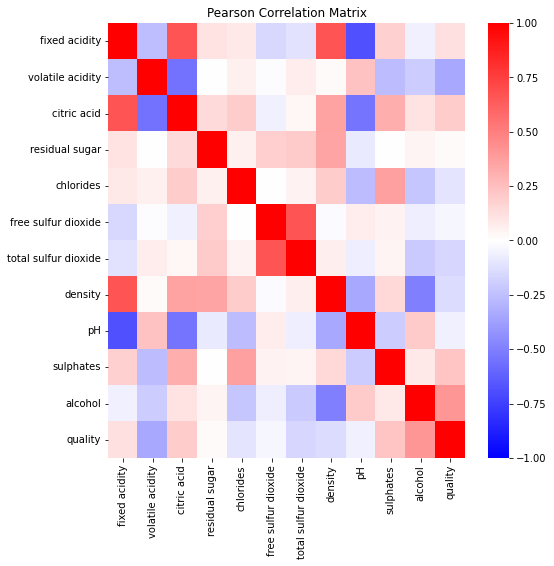

In [18]:
correlations = wine.corr(method = 'pearson')
plt.figure(figsize = (8,8))
sns.heatmap(correlations,cbar = True, cmap = 'bwr', vmin = -1, center = 0, vmax = 1)
plt.title('Pearson Correlation Matrix')
plt.show()